In [63]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/eb_pflog1ppfnorm.hvg.umap_embedding.h5ad")

In [16]:
topic_loadings = pd.read_csv("/project2/gilad/jpopp/ebQTL/results/fast_topics/fasttopics_10topics_loadings.tsv", sep="\t")
pseudocell_mapping = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/fast_topics/cell_pseudocell_mapping.tsv", sep="\t").rename(columns={'pseudocell_15': 'pseudocell'})

In [17]:
pseudocell_mapping

,cell,pseudocell
0,AAACCCACACGGCGTT-1,NA18870_10/1/2020_24
1,AAACCCACAGAAGTGC-1,NA18870_10/1/2020_140
2,AAACGAAAGGTATTGA-1,NA18870_10/1/2020_7
3,AAACGAAAGTAGATCA-1,NA18913_10/1/2020_79
4,AAACGAACACCCTCTA-1,NA19190_10/1/2020_61
...,...,...
769115,CATTCATAGGCCCGTT-49,NA18862_10/26/2020_118
769116,GGTTAACTCTTCGACC-45,NA18862_10/26/2020_127
769117,TGCGGCAGTGCCGAAA-76,NA18862_11/9/2020_33
769118,ATTCCCGAGACCAACG-82,NA18862_11/12/2020_57


In [14]:
topic_loadings

,pseudocell,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
0,NA18486_11/12/2020_0,1.810803e-04,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
1,NA18486_11/12/2020_1,2.635773e-03,2.578597e-04,1.310742e-01,0.547324,2.889042e-05,5.535438e-13,7.403806e-13,2.504652e-03,0.316174,7.156753e-13
2,NA18486_11/12/2020_10,1.755877e-04,2.628792e-05,3.474617e-02,0.573653,6.469842e-13,1.859857e-04,1.568413e-03,1.050610e-01,0.284583,7.394551e-13
3,NA18486_11/12/2020_100,2.795434e-04,1.368597e-04,2.592316e-01,0.006484,3.232649e-01,4.070316e-12,5.444164e-12,3.637904e-02,0.374224,5.262501e-12
4,NA18486_11/12/2020_101,2.142280e-12,3.125449e-12,4.137966e-12,0.006571,7.332847e-02,2.683100e-01,4.214079e-12,3.802425e-01,0.271548,4.073462e-12
...,...,...,...,...,...,...,...,...,...,...,...
17908,NA19257_12/9/2020_95,1.863034e-03,1.932746e-03,1.218155e-01,0.038479,1.938381e-03,8.910279e-12,1.072785e-01,1.538739e-01,0.184030,3.887883e-01
17909,NA19257_12/9/2020_96,4.114605e-03,1.242181e-03,1.158517e-01,0.071943,1.529142e-11,1.668805e-01,3.498748e-01,1.723020e-02,0.197883,7.497948e-02
17910,NA19257_12/9/2020_97,7.790976e-03,1.086981e-03,1.441178e-01,0.077792,4.524015e-03,1.223998e-11,3.238474e-01,2.669487e-01,0.047346,1.265461e-01
17911,NA19257_12/9/2020_98,2.126019e-03,2.354129e-03,2.023956e-02,0.095315,2.594648e-02,1.925631e-03,3.024248e-01,1.630407e-01,0.177868,2.087600e-01


In [19]:
cell_topic_loadings = topic_loadings.merge(pseudocell_mapping, on='pseudocell').set_index('cell')

In [21]:
cell_topic_loadings

,pseudocell,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10
cell,,,,,,,,,,,
AAGACAAGTCGAAACG-78,NA18486_11/12/2020_0,0.000181,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
AAGGAATCAAGGCAAC-78,NA18486_11/12/2020_0,0.000181,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
AATCGACTCAGGGTAG-78,NA18486_11/12/2020_0,0.000181,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
AATGAAGGTTAAACAG-78,NA18486_11/12/2020_0,0.000181,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
ACATTTCTCTCAACCC-78,NA18486_11/12/2020_0,0.000181,6.020243e-13,1.320030e-01,0.539953,6.865104e-13,6.068778e-13,8.117164e-13,9.830876e-13,0.327862,7.846307e-13
...,...,...,...,...,...,...,...,...,...,...,...
TCTTAGTGTATAGGAT-98,NA19257_12/9/2020_99,0.000967,5.299356e-01,6.866223e-12,0.049689,5.913935e-12,5.227940e-12,6.992520e-12,2.965229e-01,0.122885,6.759190e-12
ACCCTTGAGCTAATGA-99,NA19257_12/9/2020_99,0.000967,5.299356e-01,6.866223e-12,0.049689,5.913935e-12,5.227940e-12,6.992520e-12,2.965229e-01,0.122885,6.759190e-12
AGATGCTGTCATATGC-99,NA19257_12/9/2020_99,0.000967,5.299356e-01,6.866223e-12,0.049689,5.913935e-12,5.227940e-12,6.992520e-12,2.965229e-01,0.122885,6.759190e-12


In [28]:
adata.obs = adata.obs.merge(cell_topic_loadings, left_index=True, right_index=True, how='left')

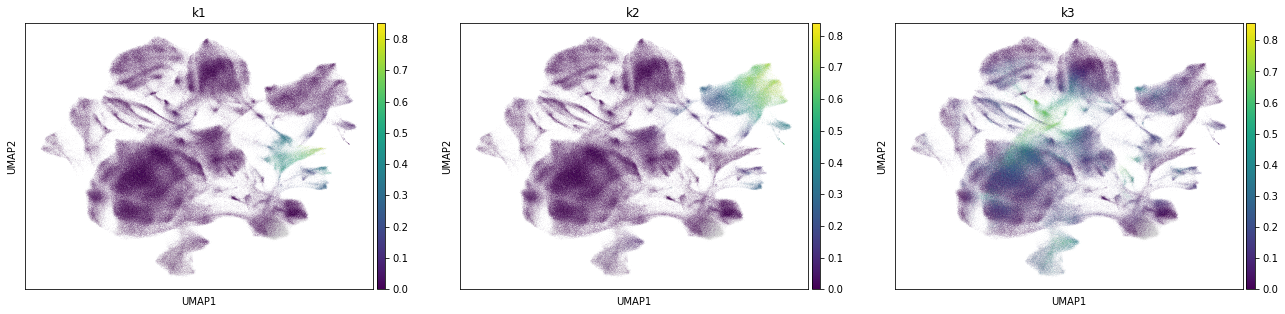

In [29]:
sc.pl.umap(adata, color=['k1', 'k2', 'k3'])

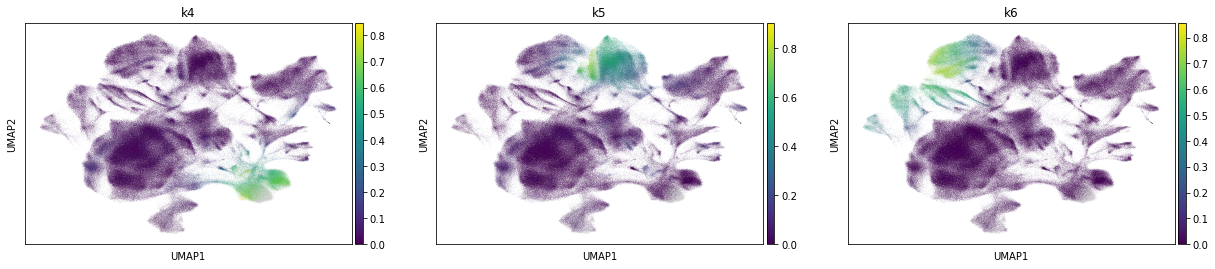

In [30]:
sc.pl.umap(adata, color=['k4', 'k5', 'k6'])

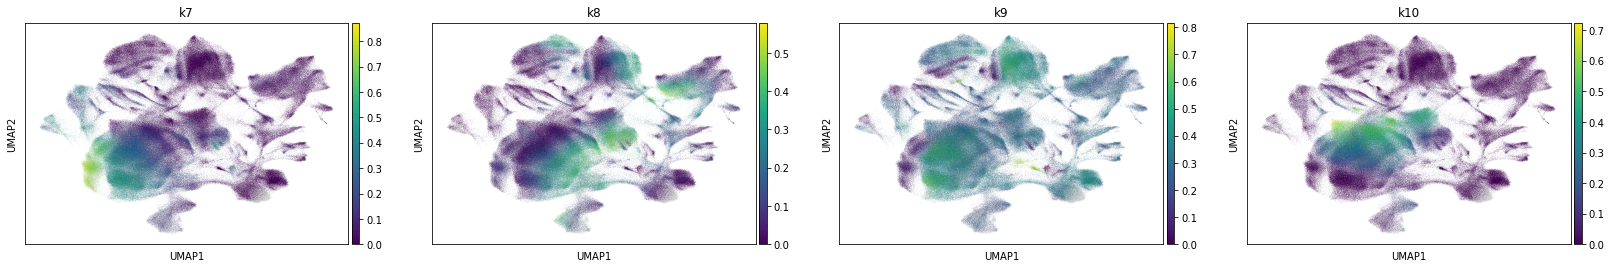

In [31]:
sc.pl.umap(adata, color=['k7', 'k8', 'k9', 'k10'])

Add cell type labels

In [37]:
celltype_labels = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/fca/eb_cellid_labels.tsv", sep="\t").rename(columns={'value': 'celltype'}).set_index("cell")

In [38]:
celltype_labels

,celltype
cell,
AAACCCACACGGCGTT-1,Vascular endothelial cells
AAACCCACAGAAGTGC-1,Retinal cells
AAACGAAAGGTATTGA-1,CNS neurons
AAACGAAAGTAGATCA-1,unassigned
AAACGAACACCCTCTA-1,Retinal cells
...,...
TTTGGTTTCGAAGCCC-118,unassigned
TTTGGTTTCGAGATAA-118,unassigned
TTTGTTGAGGATATAC-118,Acinar cells


In [39]:
adata.obs = adata.obs.merge(celltype_labels, left_index=True, right_index=True, how='left')

Drop pilot batches that didn't get topic loadings

In [45]:
topic_celltypes = adata.obs[['celltype', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10']].dropna()

In [50]:
topic_celltypes_melt = pd.melt(topic_celltypes, id_vars=["celltype"], value_vars=['k' + str(i) for i in range(1, 11)], var_name="topic", value_name="loading")

In [60]:
topic_celltypes_medians = topic_celltypes_melt.groupby(['celltype', 'topic'])['loading'].median().reset_index().pivot(index='celltype', columns='topic', values='loading')

In [70]:
dropped = ["STC2_TLX1 positive cells","Lymphatic endothelial cells","Intestinal epithelial cells","Endocardial cells"]
ecto = ["Retinal cells","CNS neurons","PNS glia","CNS glia","PNS neurons","Adrenocortical cells","Neuroendocrine cells"]
immune = ["Erythroblasts","Megakaryocytes","Lymphoid cells"]
mesoderm = ["Vascular endothelial cells","Stromal cells","Epicardial fat cells",
            "Skeletal muscle cells","Mesangial cells","Mesothelial cells",
            "Cardiomyocytes","Smooth muscle cells","Stellate cells"]
epithelial = ["Ductal cells", "Metanephric cells","Ciliated epithelial cells",
              "Ureteric bud cells","Acinar cells","Parietal and chief cells"]
endo = ["Hepatoblasts","Goblet cells","Bronchiolar and alveolar epithelial cells",
        "Squamous epithelial cells"]

In [77]:
ordered_types = endo + mesoderm + ecto + epithelial + immune + dropped 

<AxesSubplot:xlabel='topic', ylabel='celltype'>

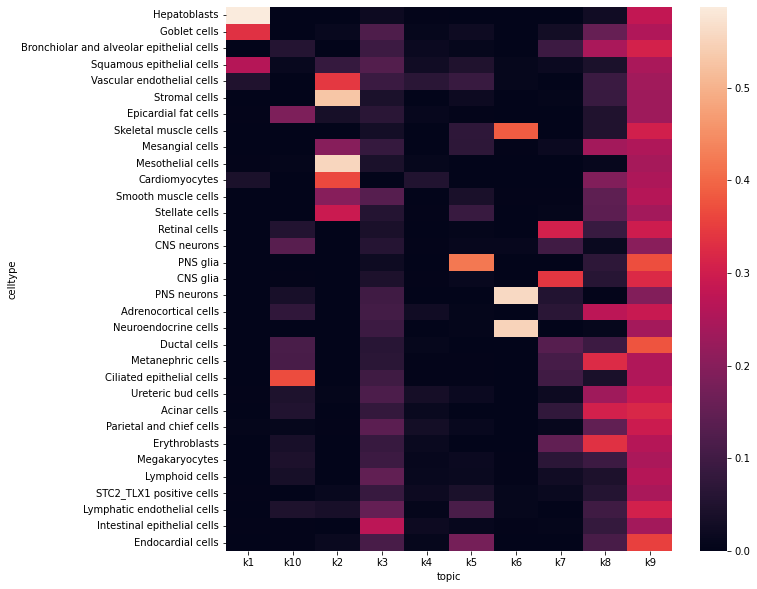

In [78]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.heatmap(topic_celltypes_medians.reindex(ordered_types))